## Cats/Dogs Keras Standard NN  ##
## Constructing X and Y for Keras ##
Use validation_split to monitor validation and overfit
CPE 4903 HW Starter Jupyter File
Instructions - see assignment in D2L

In [1]:
import numpy as np 

import os  # avoid kernal die
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import matplotlib.pyplot as plt
import os, cv2, itertools # cv2 -- OpenCV

from PIL import Image

In [2]:
import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
import tensorflow as tf
#from keras.layers import Conv2D
#from keras.layers import MaxPooling2D
#from keras.layers import Flatten

In [3]:
# np.savez_compressed('cats_dogs', X_train, X_test, Y_train, Y_test )
# X (nx x m), Y (1xm)
data = np.load('cats_equal_1.npz') # Cats = 1 output, dogs = 0

In [4]:
data.files

['arr_0', 'arr_1', 'arr_2', 'arr_3']

### Your code here to extract your training and test data matrices from "data". 
### Be sure to scale your data by dividing by 255 and reshape to get proper shapes of X and Y
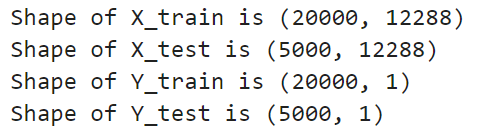


In [5]:
# Your code here

In [6]:
# Assign Data
X_train, X_test, Y_train, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# Scale Data
X_train = X_train / 255
X_test = X_test / 255

# Reshape X & Y
X_train = X_train.reshape(20000, 12288)
X_test = X_test.reshape(5000, 12288)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# Check the new shapes
print("New X_train shape:", X_train.shape)
print("New X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


New X_train shape: (20000, 12288)
New X_test shape: (5000, 12288)
Y_train shape: (20000, 1)
Y_test shape: (5000, 1)


In [7]:
ROWS = 64
COLS = 64
CHANNELS = 3
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

In [8]:
nx = X_train.shape[1]
X_train.shape

(20000, 12288)

In [9]:
nx

12288

### Your Keras code next
Ending with these two lines
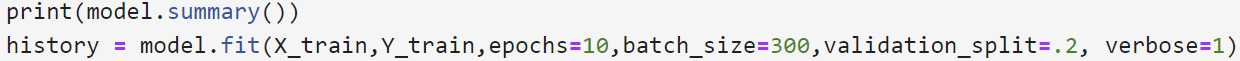

Be sure to plot the loss and accuracy of both training and validation
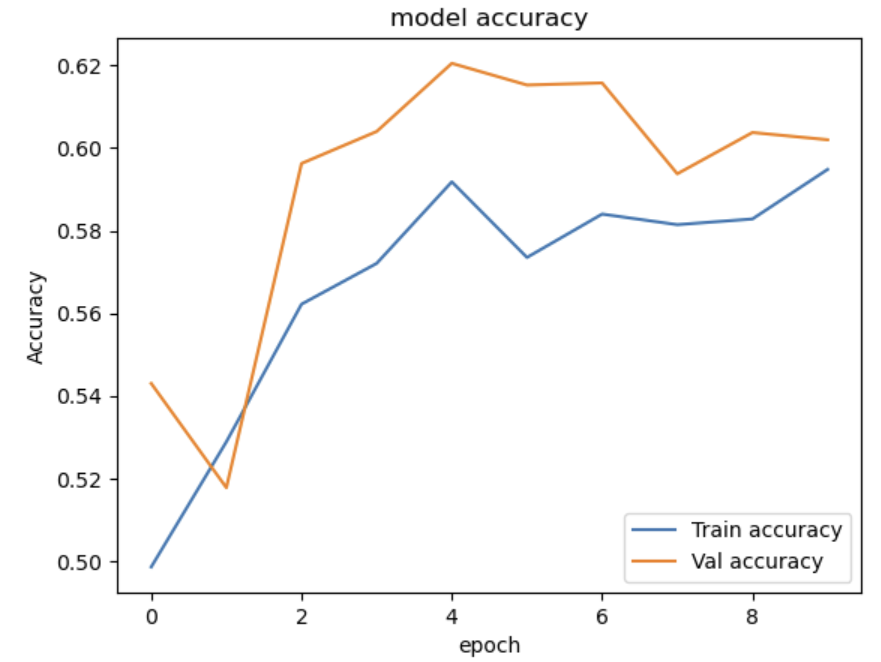
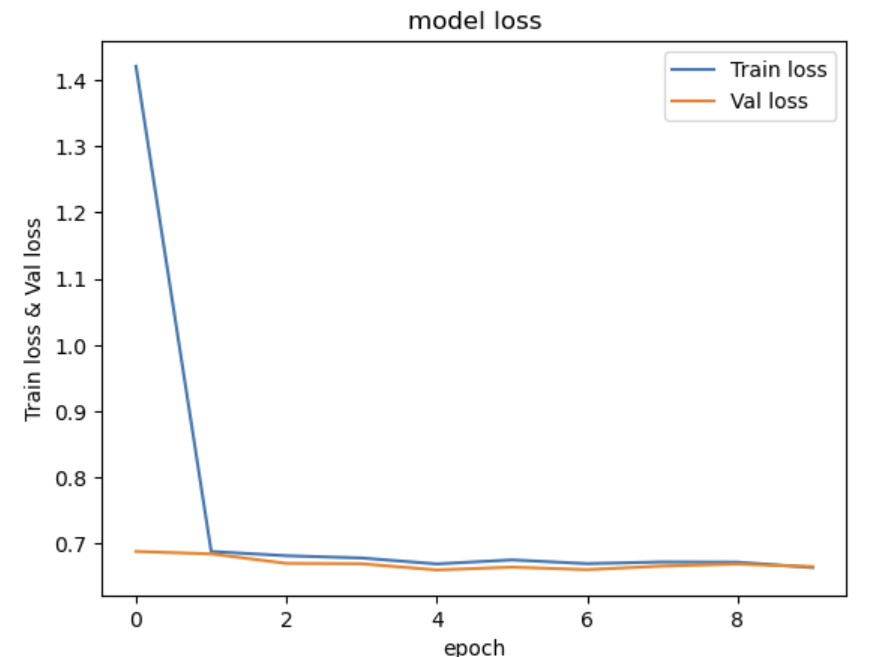

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                393248    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 393,793
Trainable params: 393,793
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
54/54 [==============================] - 1s 15ms/step - loss: 0.7002 - accuracy: 0.4989 - val_loss: 0.6936 - val_accuracy: 0.4762
Epoch 2/10
54/54 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6936 - val_accuracy: 0.4895
Epoch 3/10
54/54 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy:

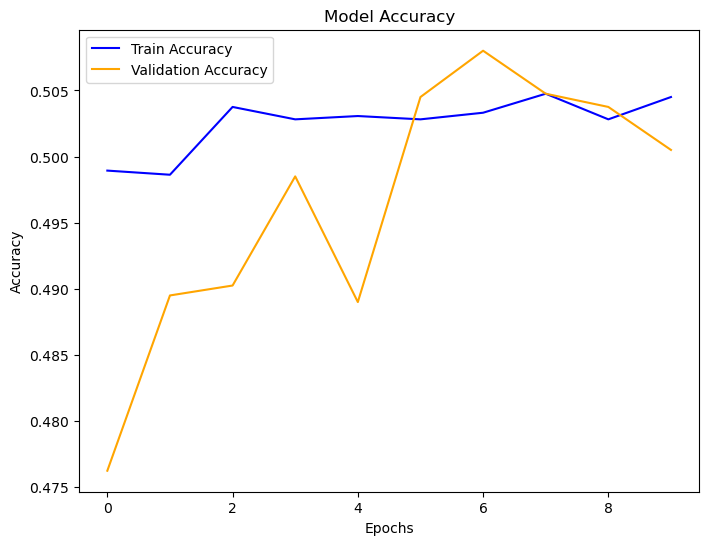

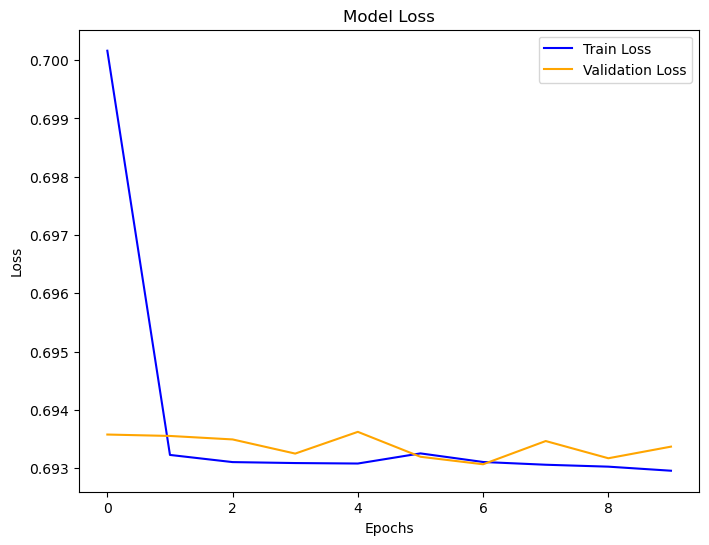

In [11]:
# Your Keras code here
from keras.optimizers import Adam

# Reshape Y
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# NN Architecture
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(12288,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

sgd = keras.optimizers.SGD(learning_rate = 0.03)

# Compile model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# Print model summary
print(model.summary())

# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=300, validation_split=0.2, verbose=1)

# Plot Model Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('NN Accuracy Graph.png')
plt.show()

# Plot Model Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('NN Loss Graph.png')
plt.show()

### Test Cases
### Run code below to see if your model can recognize cat and dog not-seen-before images

In [12]:
# Evaluate the model on the training data using `evaluate`
print('Evaluate on train data')
Yhat = model.predict(X_train)
acc = np.mean(np.rint(Yhat) == Y_train) # good trick to calculate % correct from binary output compaison
print('The train accuracy rate is: ', acc * 100)

Evaluate on train data
The train accuracy rate is:  50.49


In [13]:
# Evaluate the model on the training data using `evaluate`
print('Evaluate on test data')
Yhat_test = model.predict(X_test)
acc = np.mean(np.rint(Yhat_test) == Y_test) # good trick to calculate % correct from binary output compaison
print('The test accuracy rate is: ', acc * 100)

Evaluate on test data
The test accuracy rate is:  51.519999999999996


In [ ]:
file = "cat2.jpg"
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS)/255
A = model.predict(X_img)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image)

In [ ]:
file = "dog2.jpg"
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS)/255
A = model.predict(X_img)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image)